## Introduction

When conducting a hypothesis test at a fixed significance level $\alpha$, we can make two types of errors. These errors do not result from mistakes in the testing process but occur when our conclusion does not align with the true state of reality. The two types of errors are **Type I error** and **Type II error**. Understanding these errors is essential for designing effective tests and correctly interpreting results.<br/>

*Note: In practical situations, we do not know for certain if we made the correct decision or if we made one of these errors.*

### Goals of This Notebook
1. **Understand** Type I errors, Type II errors, and the **power of a test**.
2. **Visualize** the relationship between the significance level ($\alpha$) and the probability of a Type II error ($\beta$).
3. **Calculate** $\beta$ and the power of a test in different scenarios.
4. **Analyze factors** that influence the power of a test, such as sample size, effect size, and significance level.

## 1.Definitions

A **Type I error** occurs when we reject $H_{0}$ when in reality, it is true.
- The probability of committing a Type I error, given that $H_{0}$ is true, is called the *significance level* of the test, denoted by $\alpha$.
- Mathematically, we express this probability as:

$$
    \alpha = P(\text{reject}\;H_{0}|H_{0}\;\text{is true}).
$$

A **Type II error** happens when we fail to reject $H_{0}$ when in fact, it is false.
- We denote the probability of a Type II error by $\beta$.
- Mathematically, we express this probability as:

$$
    \beta = P(\text{fail to reject}\;H_{0}|H_{0}\;\text{is false}).
$$

The **power** of a test is the probability of correctly rejecting $H_{0}$ when it is false.
- Power measures the ability of a test to detect a false null hypothesis.
- Since power represents the complement of $\beta$, we express it as:

$$
\begin{aligned}
    \text{Power} &= P(\text{reject}\;H_{0} \mid H_{0}\;\text{is false})\\
                 &= 1 - P(\text{fail to reject}\;H_{0} \mid H_{0}\;\text{is false})\\
                 &= 1 - \beta
\end{aligned}
$$

## 2.The Trade-off Between $\alpha$ and $\beta$

In practice, making a Type I error is often considered more serious than making a Type II error. To lower the probability of a Type I error, we choose a small significance level $\alpha$, making it difficult to reject $H_{0}$ when it is true.<br/>
However, a smaller $\alpha$ increases the probability of failing to reject $H_{0}$ when it is false, leading to a lot of Type II errors.<br>
To better understand this inverse relationship, let's visualize how $\beta$ changes as $\alpha$ increases through an example of a **one-sample $Z$-test**.

### **Example**


Suppose we have a normally distributed population with:
- True mean: $\mu = 1$,
- Population standard deviation: $\sigma = 5$,
- Sample size: $n = 20$.

We test the null hypothesis:
$$
    H_{0}: \mu = 0
$$
against the one-sided alternative:
$$
    H_{a}: \mu > 0.
$$
The goal is to visualize hwo $\beta$ changes as $\alpha$ increases from 0 to 1.

### Visualization

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

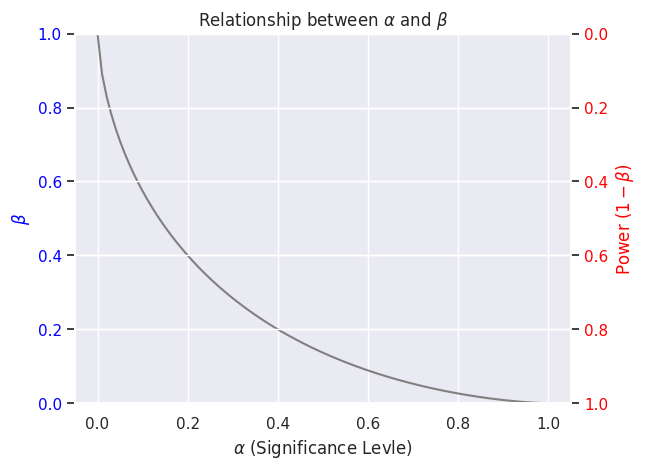

In [ ]:
# Set searborn style
sns.set_theme(style="darkgrid")

# Parameters
mean_null =0
mean_true = 1
sigma = 5
sample_size = 30
std_error = sigma / np.sqrt(sample_size)

# Compute values
alpha_vals = np.linspace(0, 1, 101)
critical_vals = mean_null + stats.norm.ppf(1 - alpha_vals) * std_error
beta_vals = stats.norm.cdf(critical_vals, loc=mean_true, scale=std_error)
power_vals = 1 - beta_vals

# Create figure and axis
fig, ax1 = plt.subplots()

# Plot beta (Type II error)
ax1.plot(alpha_vals, beta_vals, color='grey')
ax1.set_xlabel(r'$\alpha$ (Significance Levle)')
ax1.set_ylabel(r'$\beta$', color='blue')
ax1.set_ylim(0.0, 1.0)
ax1.tick_params(axis='y', labelcolor='blue')

# Create second y-axis for power (1 - beta), but invert it
ax2 = ax1.twinx()
ax2.set_ylabel(r'Power $(1 - \beta)$', color='red')
ax2.set_ylim(1.0, 0.0)  # Inverted scale
ax2.tick_params(axis='y', labelcolor='red')

# Title
plt.title(r'Relationship between $\alpha$ and $\beta$')

# Show plot
plt.show()

## 3.Calculating Power and the Probability of a Type II Error

In this section, we will walk through an example to calculate the power of a test and the probability of a Type II error for a one-sided $Z$-test. We will also visualize these probabilities under the distributions.

### **Example**
Suppose we are sampling $25$ observations from a normally distributed population where it is known that $\sigma = 8$, but $\mu$ is unknown. We wish to test $H_{0}:\; \mu = 100$ against $H_{a}:\; \mu < 100$ at $\alpha = 0.05$. Suppose, in reality, the null hypothesis is false and $\mu = 98$. What is the probability of a Type II error, and what is the power of the test?

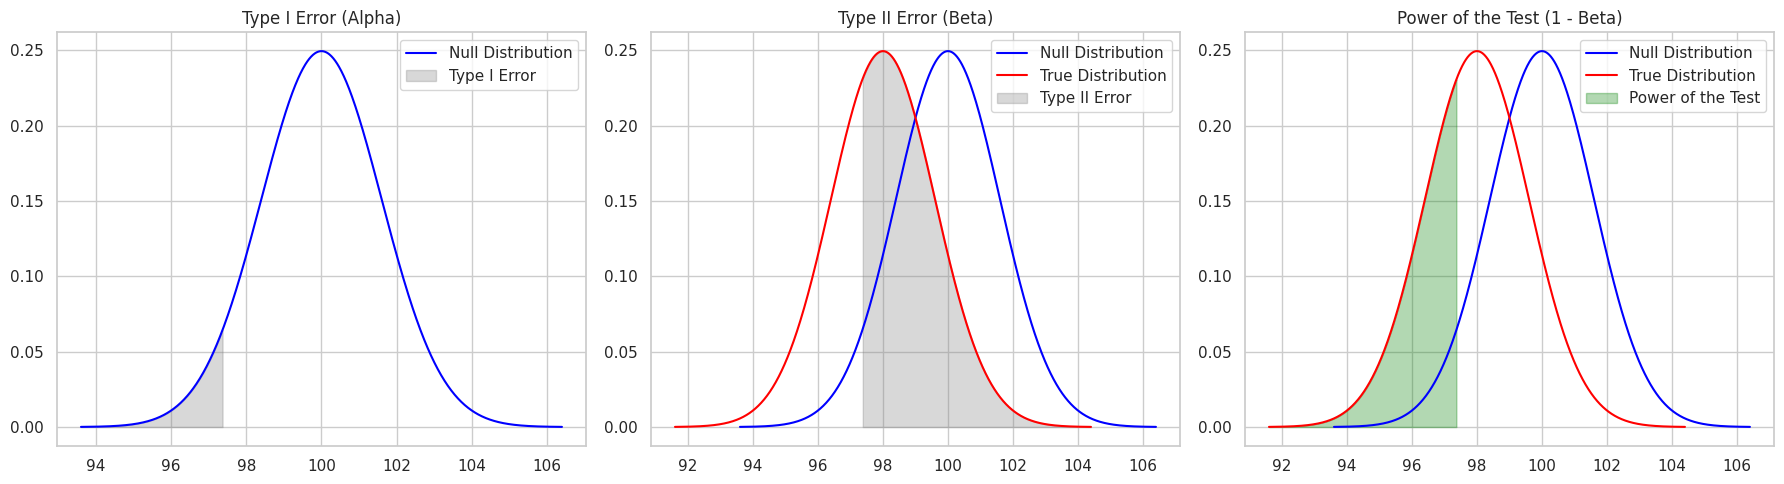

Critical Value: 97.368
Type II Error (Beta): 0.654
Power of the Test (1 - Beta): 0.346


In [ ]:
# Set seaborn style
sns.set_theme(style="whitegrid")

# Define Parameters
alpha = 0.05
mean_null = 100
mean_true = 98
sigma = 8
sample_size = 25

# Standard Error
std_error = sigma / np.sqrt(sample_size)

# Compute critical value (left-tailed test)
critical_value = mean_null + stats.norm.ppf(alpha) * std_error

# Function to generate distribution data
def generate_data(mean, std_dev, num_points=1000):
  x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, num_points)
  y = stats.norm.pdf(x, loc=mean, scale=std_dev)
  return x, y

# Generate data
x_null, y_null = generate_data(mean_null, std_error)
x_true, y_true = generate_data(mean_true, std_error)

# Compute Type II error probability
beta = 1 - stats.norm.cdf(critical_value, loc=mean_true, scale=std_error)
power = 1 - beta  # Power of the test

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Type I Error (Alpha)
axes[0].plot(x_null, y_null, color='blue', label='Null Distribution')
axes[0].fill_between(x_null[x_null < critical_value], stats.norm.pdf(x_null[x_null < critical_value], mean_null, std_error),
                     color='grey', alpha=0.3, label='Type I Error')
axes[0].set_title('Type I Error (Alpha)')
axes[0].legend()

# Type II Error (Beta)
axes[1].plot(x_null, y_null, color='blue', label='Null Distribution')
axes[1].plot(x_true, y_true, color='red', label='True Distribution')
axes[1].fill_between(x_true[x_true >= critical_value], stats.norm.pdf(x_true[x_true >= critical_value], mean_true, std_error),
                     color='grey', alpha=0.3, label='Type II Error')
axes[1].set_title('Type II Error (Beta)')
axes[1].legend()

# Power of the Test (1 - Beta)
axes[2].plot(x_null, y_null, color='blue', label='Null Distribution')
axes[2].plot(x_true, y_true, color='red', label='True Distribution')
axes[2].fill_between(x_true[x_true < critical_value], stats.norm.pdf(x_true[x_true < critical_value], mean_true, std_error),
                     color='green', alpha=0.3, label='Power of the Test')
axes[2].set_title('Power of the Test (1 - Beta)')
axes[2].legend()

plt.tight_layout()
plt.show()

# Print computed values
print(f"Critical Value: {critical_value:.3f}")
print(f"Type II Error (Beta): {beta:.3f}")
print(f"Power of the Test (1 - Beta): {power:.3f}")

## 4.What Factors Affect the Power of the Test?

The power of a hypothesis test is influenced by several factors. In this section, we will explore how the following variables impact the probability of correctly rejecting the null hypothesis:
- Sample size ($n$)
- Population standard deviation ($\sigma$)
- True population mean ($\mu$)
- Significance level ($\alpha$)

#### Effect of the True Population Mean ($\mu$)

First, we analyze how the true value of the population mean ($\mu$) affects the power of the test. Using the example from the previous section, instead of calculating the power at a single value of $\mu = 98$, we will compute the power for a range of values between 92 and 100.

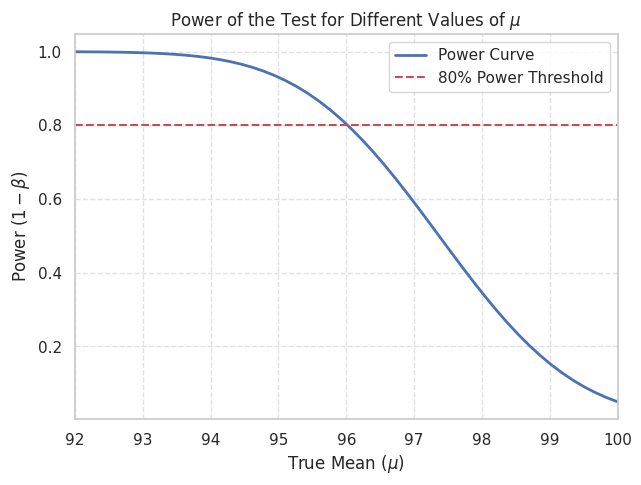

In [122]:
# Set seaborn style
sns.set_theme(style="whitegrid")

# Parameters
alpha = 0.05
mean_null = 100
mean_true_range = np.linspace(92, 100, 50)  # Range of true means
sigma = 8
sample_size = 25

# Compute standard error
std_error = sigma / np.sqrt(sample_size)

# Compute critical value
critical_value = mean_null + stats.norm.ppf(alpha) * std_error

# Compute Type II error probability and power
beta_values = 1 - stats.norm.cdf(critical_value, loc=mean_true_range, scale=std_error)
power_values = 1 - beta_values

# Create visualization
plt.figure(figsize=(7, 5))
plt.plot(mean_true_range, power_values, label='Power Curve', color='b', lw=2)
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Power Threshold')
plt.xlabel(r'True Mean ($\mu$)')
plt.ylabel(r'Power ($1 - \beta$)')
plt.title(r'Power of the Test for Different Values of $\mu$')
plt.xlim(92, 100)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

From the plot, we observe that power increases as the true value of $\mu$ moves further away from the hypothesized mean. This difference is known as the effect size. A larger effect size makes it easier to detect a false null hypothesis, increasing the power of the test.

#### Effect of $\alpha$, $n$, and $\sigma$ on Power


Apart from the effect size, the power of a test also depends on the significance level ($\alpha$), sample size ($n$), and population standard deviation ($\sigma$). To understand their individual impacts, we will modify one factor at a time while keeping the others constant.

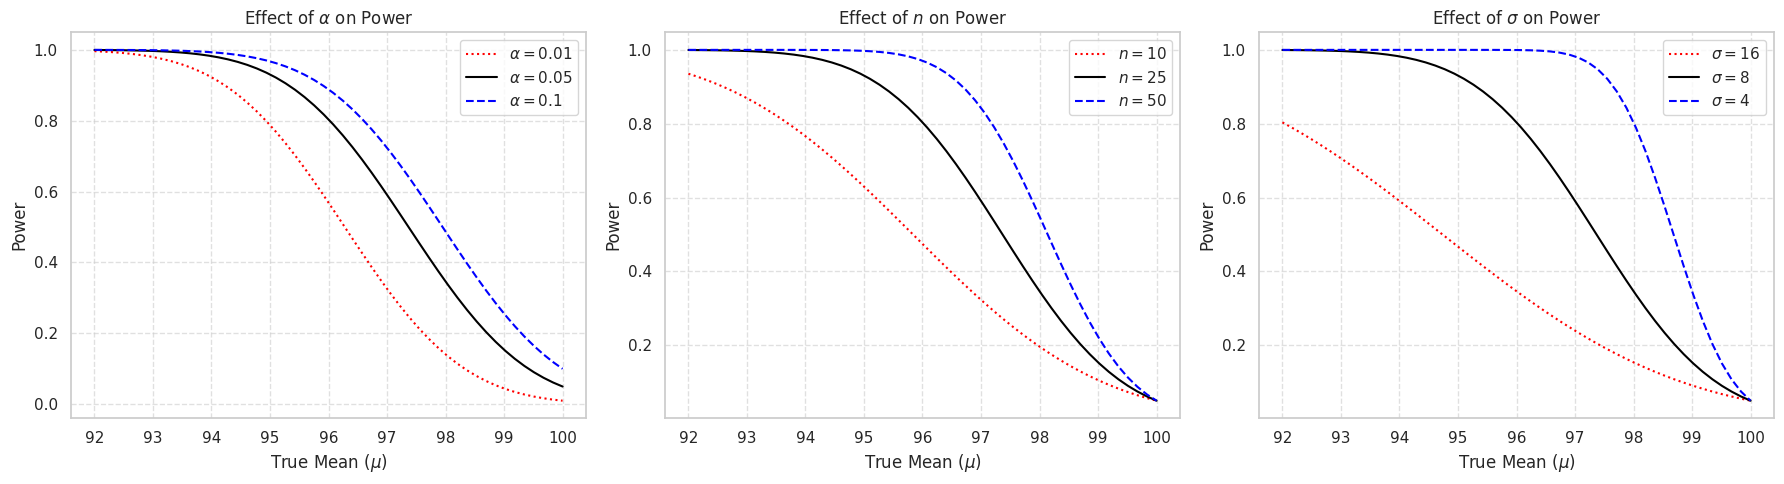

In [125]:
# Set seaborn style
sns.set_theme(style="whitegrid")

# Parameters
alpha_vals = [0.01, 0.05, 0.10]
sample_sizes = [10, 25, 50]
sigma_vals = [16, 8, 4]

mean_null = 100
mean_true_range = np.linspace(92, 100, 50)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

### Case 1: Varying alpha (significance level) ###
std_error = sigma_vals[1] / np.sqrt(sample_sizes[1])
critical_values = mean_null + stats.norm.ppf(np.array(alpha_vals)) * std_error

# Compute power
beta_values = 1 - stats.norm.cdf(critical_values[:, np.newaxis], loc=np.tile([mean_true_range], (3, 1)), scale=std_error)
power = 1 - beta_values

# Plot power curves
for i, alpha in enumerate(alpha_vals):
    linestyle = [':', '-', '--'][i]
    color = ['red', 'black', 'blue'][i]
    axes[0].plot(mean_true_range, power[i], linestyle=linestyle, color=color, label=rf'$\alpha = {alpha}$')

axes[0].set_title(r'Effect of $\alpha$ on Power')
axes[0].set_xlabel(r'True Mean ($\mu$)')
axes[0].set_ylabel('Power')
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.6)

### Case 2: Varying sample size (n) ###
std_errors = sigma_vals[1] / np.sqrt(np.array(sample_sizes))
critical_values = mean_null + stats.norm.ppf(alpha_vals[1]) * std_errors

# Compute power
beta_values = 1 - stats.norm.cdf(critical_values[:, np.newaxis], loc=np.tile(mean_true_range, (3, 1)), scale=std_errors[:, np.newaxis])
power = 1 - beta_values

# Plot power curves
for i, n in enumerate(sample_sizes):
    linestyle = [':', '-', '--'][i]
    color = ['red', 'black', 'blue'][i]
    axes[1].plot(mean_true_range, power[i], linestyle=linestyle, color=color, label=rf'$n = {n}$')

axes[1].set_title(r'Effect of $n$ on Power')
axes[1].set_xlabel(r'True Mean ($\mu$)')
axes[1].set_ylabel('Power')
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.6)

### Case 3: Varying standard deviation (sigma) ###
std_errors = np.array(sigma_vals) / np.sqrt(sample_sizes[1])
critical_values = mean_null + stats.norm.ppf(alpha_vals[1]) * std_errors

# Compute power
beta_values = 1 - stats.norm.cdf(critical_values[:, np.newaxis], loc=np.tile(mean_true_range, (3, 1)), scale=std_errors[:, np.newaxis])
power = 1 - beta_values

# Plot power curves
for i, sigma in enumerate(sigma_vals):
    linestyle = [':', '-', '--'][i]
    color = ['red', 'black', 'blue'][i]
    axes[2].plot(mean_true_range, power[i], linestyle=linestyle, color=color, label=rf'$\sigma = {sigma}$')

axes[2].set_title(r'Effect of $\sigma$ on Power')
axes[2].set_xlabel(r'True Mean ($\mu$)')
axes[2].set_ylabel('Power')
axes[2].legend()
axes[2].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

The plots above illustrate the following relationships:
- As $\alpha$ increases, the power of the test increases. A higher significance level makes it easier to reject $H_0$, reducing Type II errors.
- As sample size ($n$) increases, the power of the test increases. Larger samples provide more precise estimates, reducing uncertainty.
- As population standard deviation ($\sigma$) decreases, the power of the test increases. Lower variability makes it easier to detect differences between the null and alternative hypotheses.

These factors play a crucial role in hypothesis testing. When designing an experiment, adjusting these parameters appropriately can improve the ability to detect real effects.

## References:
- [Chapter 6 in JB Statistics](https://www.jbstatistics.com/category/hypothesis-testing/)